In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
accidents = pd.read_csv('DataSet/Accidents0514.csv',index_col='Accident_Index')
vehicles= pd.read_csv('DataSet/Vehicles0514.csv', index_col='Accident_Index')
casualties = pd.read_csv('DataSet/Casualties0514.csv', index_col='Accident_Index')

In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640597 entries, 200501BS00001 to 2014984139614
Data columns (total 31 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Location_Easting_OSGR                        1640486 non-null  float64
 1   Location_Northing_OSGR                       1640486 non-null  float64
 2   Longitude                                    1640486 non-null  float64
 3   Latitude                                     1640486 non-null  float64
 4   Police_Force                                 1640597 non-null  int64  
 5   Accident_Severity                            1640597 non-null  int64  
 6   Number_of_Vehicles                           1640597 non-null  int64  
 7   Number_of_Casualties                         1640597 non-null  int64  
 8   Date                                         1640597 non-null  object 
 9   Day_of_Week                      

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype
---  ------                            -----
 0   Vehicle_Reference                 int64
 1   Vehicle_Type                      int64
 2   Towing_and_Articulation           int64
 3   Vehicle_Manoeuvre                 int64
 4   Vehicle_Location-Restricted_Lane  int64
 5   Junction_Location                 int64
 6   Skidding_and_Overturning          int64
 7   Hit_Object_in_Carriageway         int64
 8   Vehicle_Leaving_Carriageway       int64
 9   Hit_Object_off_Carriageway        int64
 10  1st_Point_of_Impact               int64
 11  Was_Vehicle_Left_Hand_Drive?      int64
 12  Journey_Purpose_of_Driver         int64
 13  Sex_of_Driver                     int64
 14  Age_of_Driver                     int64
 15  Age_Band_of_Driver                int64
 16  Engine_Capacity_(CC)              int64
 17  Propulsion_Cod

In [6]:
casualties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216720 entries, 200501BS00001 to 2014984139614
Data columns (total 14 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Vehicle_Reference                   int64
 1   Casualty_Reference                  int64
 2   Casualty_Class                      int64
 3   Sex_of_Casualty                     int64
 4   Age_of_Casualty                     int64
 5   Age_Band_of_Casualty                int64
 6   Casualty_Severity                   int64
 7   Pedestrian_Location                 int64
 8   Pedestrian_Movement                 int64
 9   Car_Passenger                       int64
 10  Bus_or_Coach_Passenger              int64
 11  Pedestrian_Road_Maintenance_Worker  int64
 12  Casualty_Type                       int64
 13  Casualty_Home_Area_Type             int64
dtypes: int64(14)
memory usage: 253.7+ MB


In [7]:
accidents = accidents.join(vehicles, how='outer')

# Identifying and cleaning Missing Values

In [8]:
accidents['Date_time'] = accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

In [20]:
#Using necessary columns for analysis
accident_data = accidents[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]
target = accidents['Accident_Severity']

# Standardizing our dataset

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(accident_data)

# Convert the standardized array back to a DataFrame
df_standardized = pd.DataFrame(scaled_data, columns=accident_data.columns)

# Principal Component Analysis

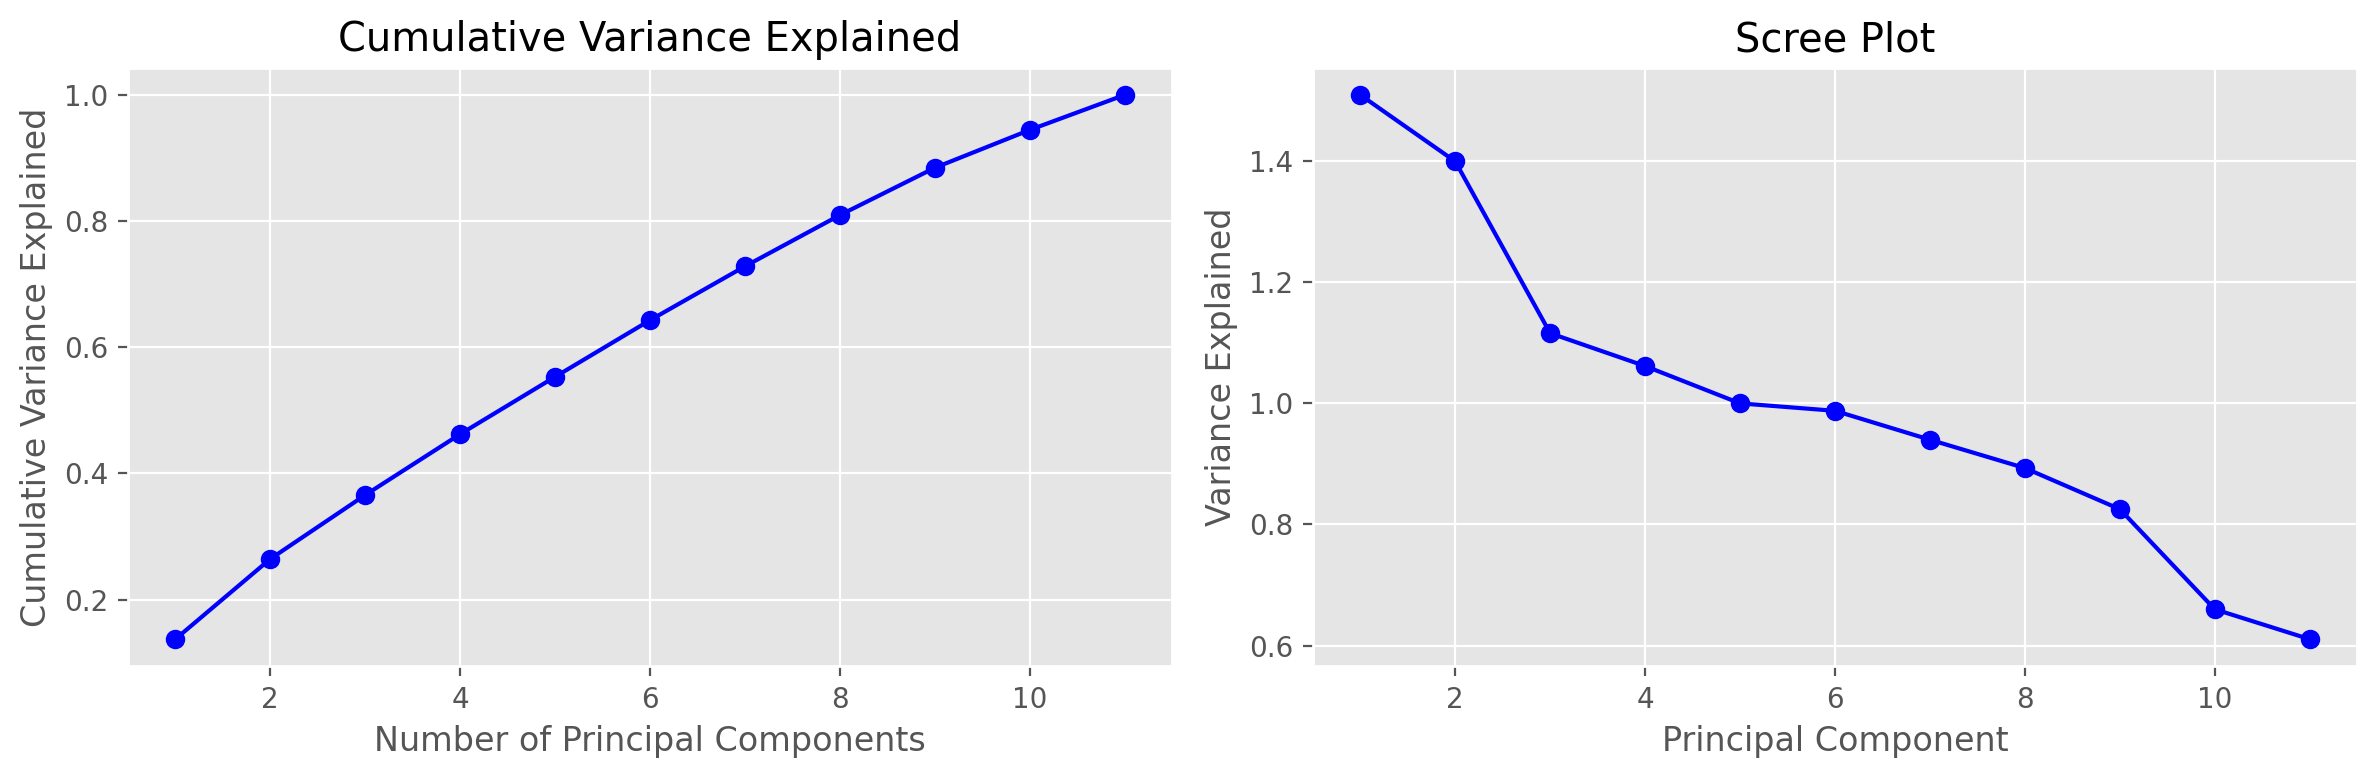

In [22]:
# Perform PCA
num_components = min(len(accident_data.columns), len(accident_data))
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(df_standardized)

# Create a DataFrame with PCA results
columns_pca = [f'PC{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=pca_result, columns=columns_pca)

# Display the result
# print("Original DataFrame:")
# print(accident_data.head())
# print("\nStandardized DataFrame:")
# print(df_standardized.head())
# print("\nDataFrame with PCA:")
# print(df_pca.head())


cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative variance explained
plt.figure(figsize=(12, 4))

# Cumulative Variance Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_components + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)

# Scree Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_components + 1), pca.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)

plt.tight_layout()
plt.show()

Based on the above graphs we choose the first three principal components for our analysis

In [55]:
# Display the result
print("Original DataFrame:")
print(accident_data.head())
# print("\nStandardized DataFrame:")
# print(df_standardized.head())
print("\nDataFrame with PCA:")
print(df_pca.head())

Original DataFrame:
                Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  \
Accident_Index                                                               
200501BS00007                                             1             41   
200501BS00010                                             1             35   
200501BS00011                                             1             42   
200501BS00012                                             1             34   
200501BS00014                                             1             19   

                Vehicle_Type  Age_of_Vehicle  Engine_Capacity_(CC)  \
Accident_Index                                                       
200501BS00007              9               4                  4266   
200501BS00010              9              13                  1998   
200501BS00011             11               2                  8268   
200501BS00012              9               6                  1988   
200501BS00014

In [23]:
df_pca = df_pca.iloc[:, :3]

In [24]:
print(df_pca.head())

        PC1       PC2       PC3
0  0.915245  0.687186 -0.716516
1 -0.310422  0.077572 -1.269328
2  3.261613  0.999451  0.229915
3 -0.120566  0.153503 -0.988679
4 -1.683070  0.494273 -0.109403


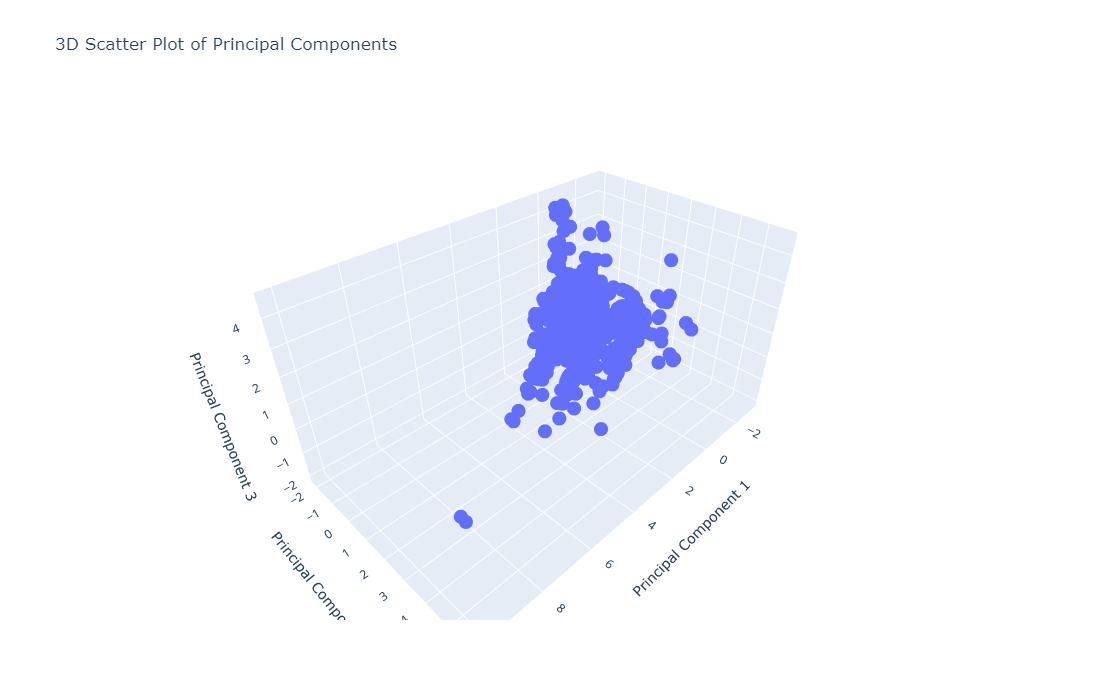

In [32]:
import plotly.express as px

# Creating an interactive 3D scatter plot using Plotly for the first 2000 data points
df_plot = df_pca.iloc[:2000, :]
fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', title='3D Scatter Plot of Principal Components')
fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'
                ),
                width=1000, height=700)
fig.show()

# Clustering

## K-Means - Elbow Method

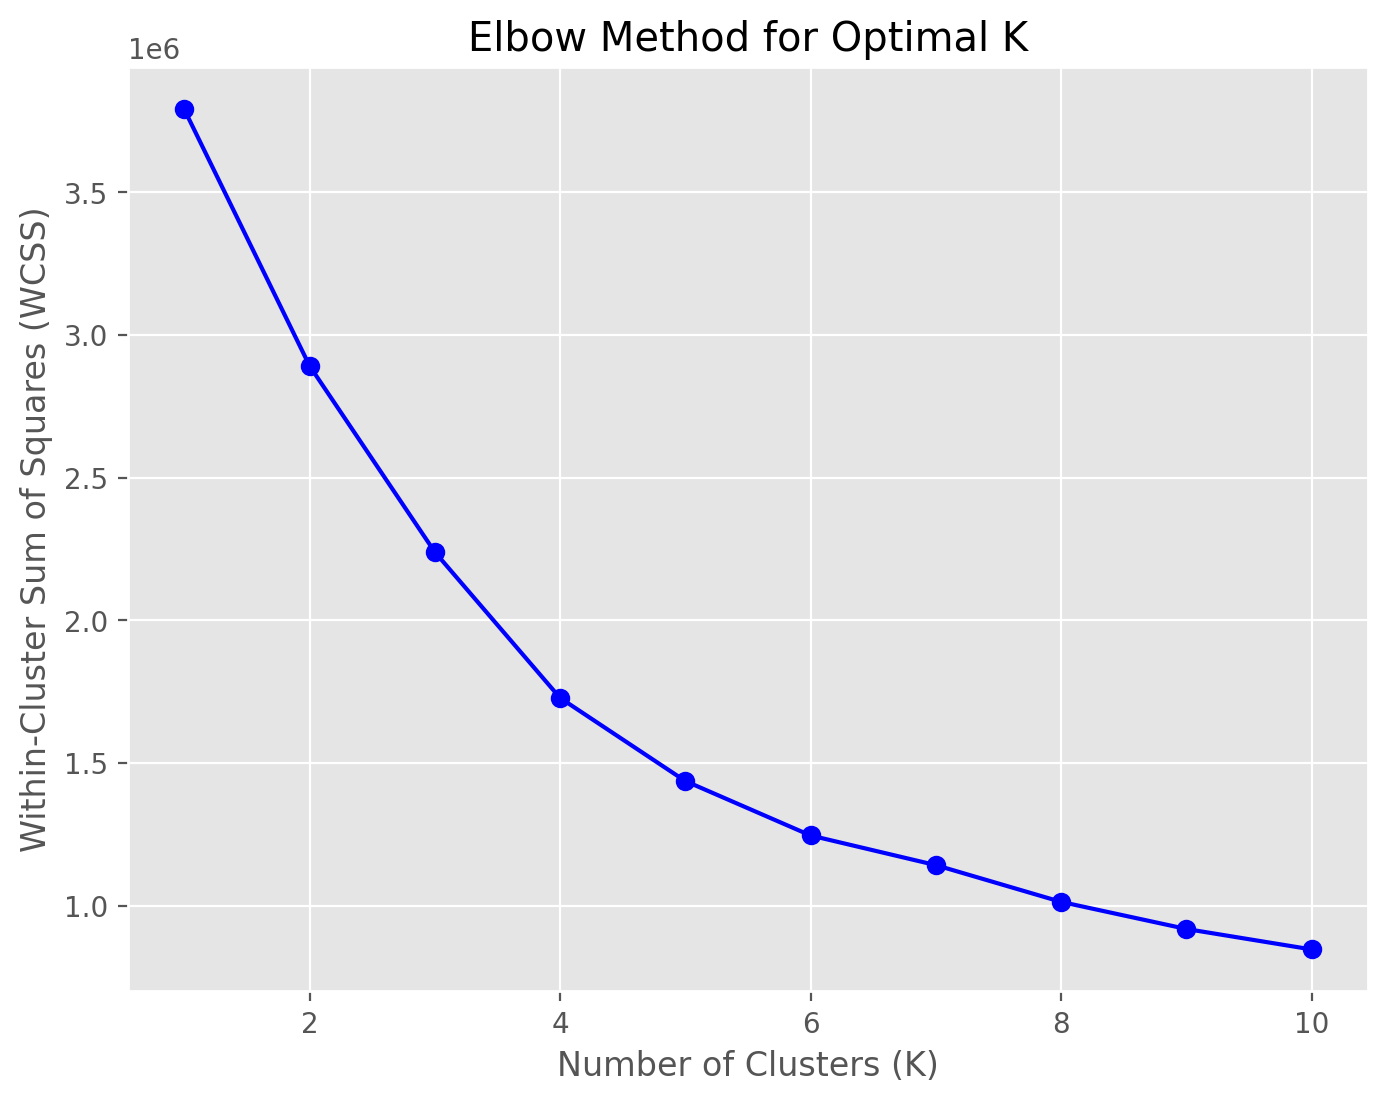

In [36]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

## K-Means - Silhouette Method

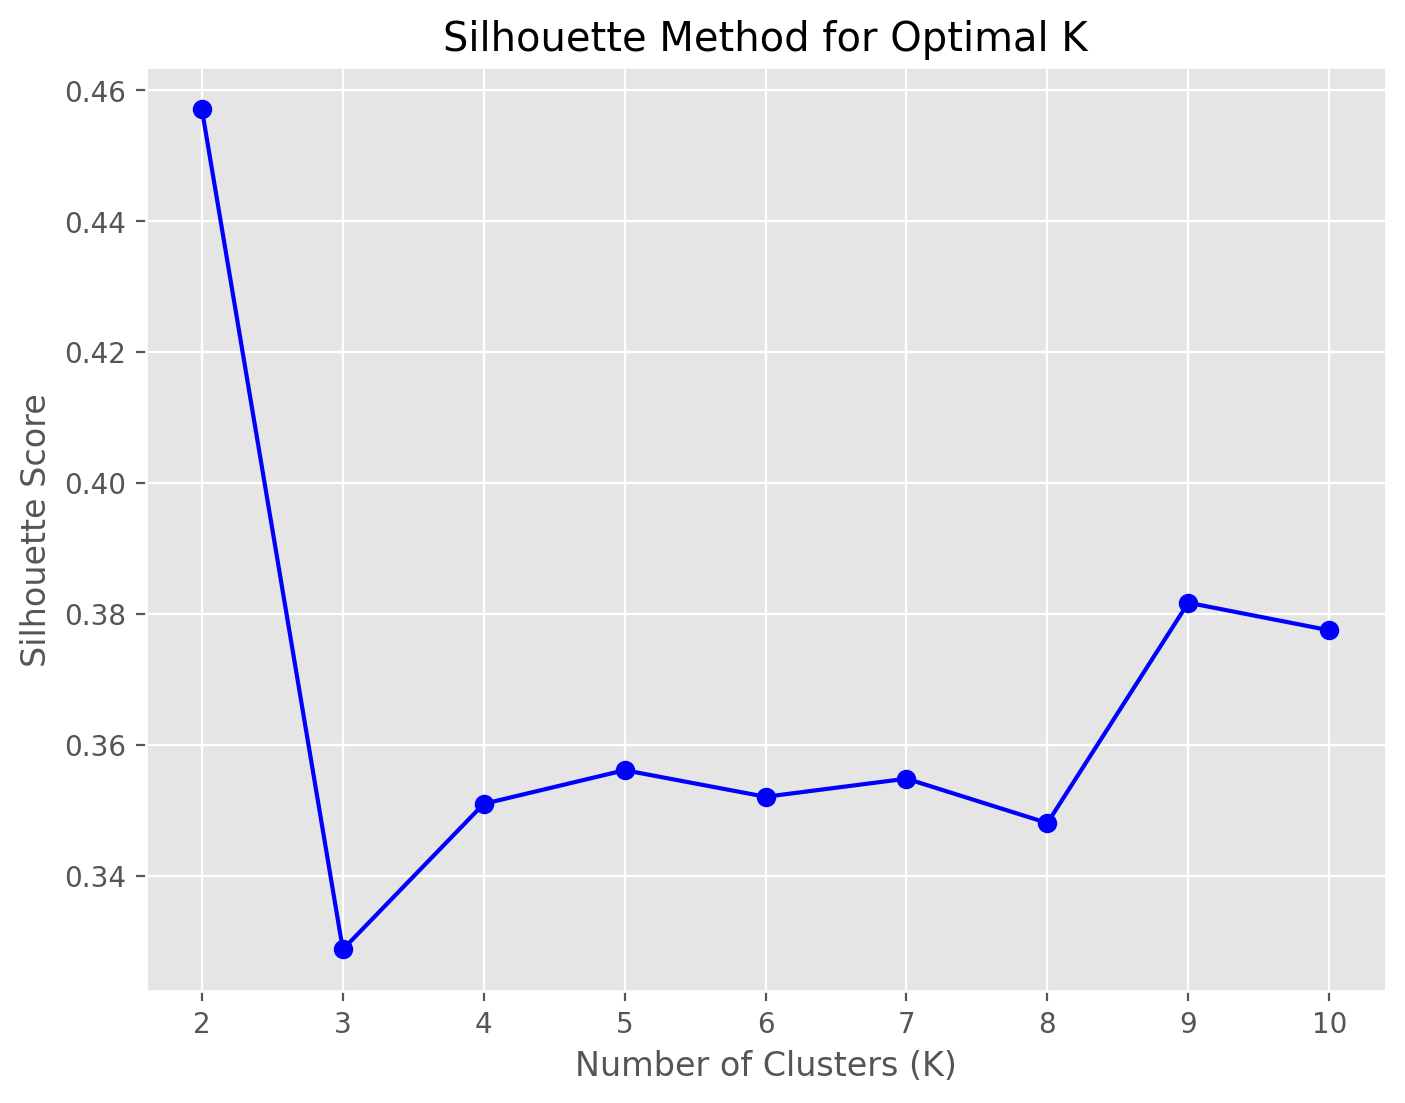

In [38]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca.iloc[:2000, :])
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca.iloc[:2000, :], labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Based on outputs from Elbow method and Silhoutte method, we choose *k = 4*  as optimum clusters.

## K-Means Clustering

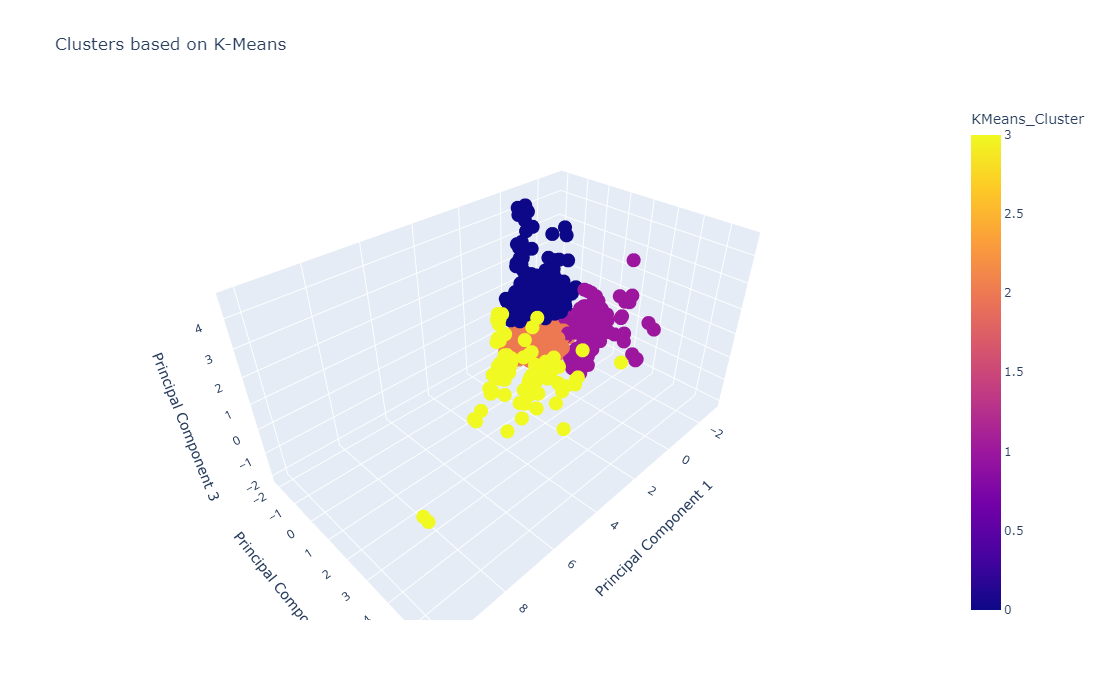

In [50]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_pca)

# Plotting K-Means Clustering
df_plot = df_pca.iloc[:2000, :]
fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3',color = 'KMeans_Cluster', title='Clusters based on K-Means')
fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'
                ),
                width=1000, height=700)
fig.show()

## Hierarchical Clustering

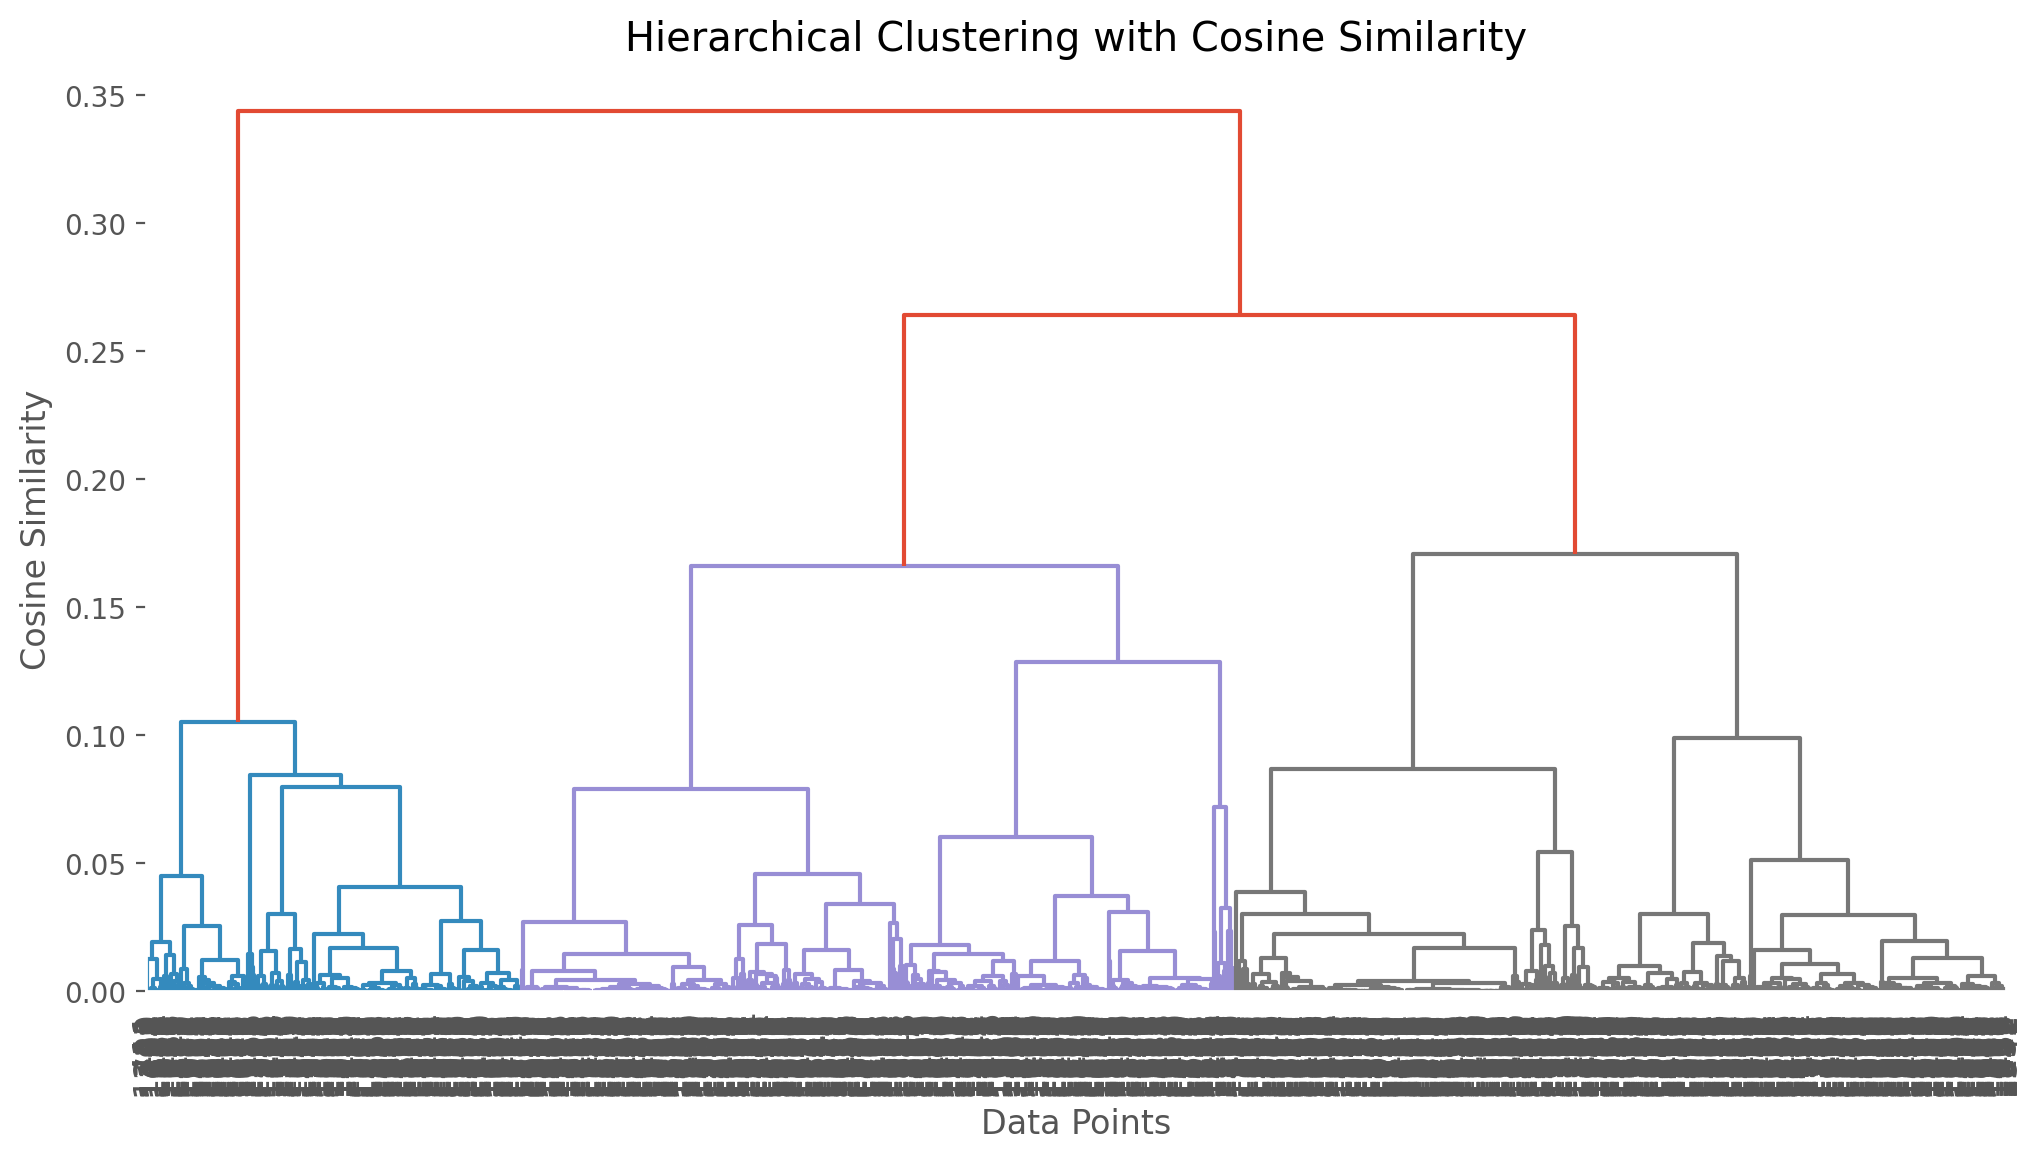

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Calculate pairwise cosine similarity
cosine_similarity_matrix = pairwise_distances(df_plot, metric='cosine')

# Perform hierarchical clustering using linkage with Cosine Similarity
hierarchical_clusters = linkage(cosine_similarity_matrix, method='average', metric='cosine')

# Plotting Hierarchical Clustering Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(hierarchical_clusters, labels=df_plot.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering with Cosine Similarity')
plt.xlabel('Data Points')
plt.ylabel('Cosine Similarity')
plt.show()

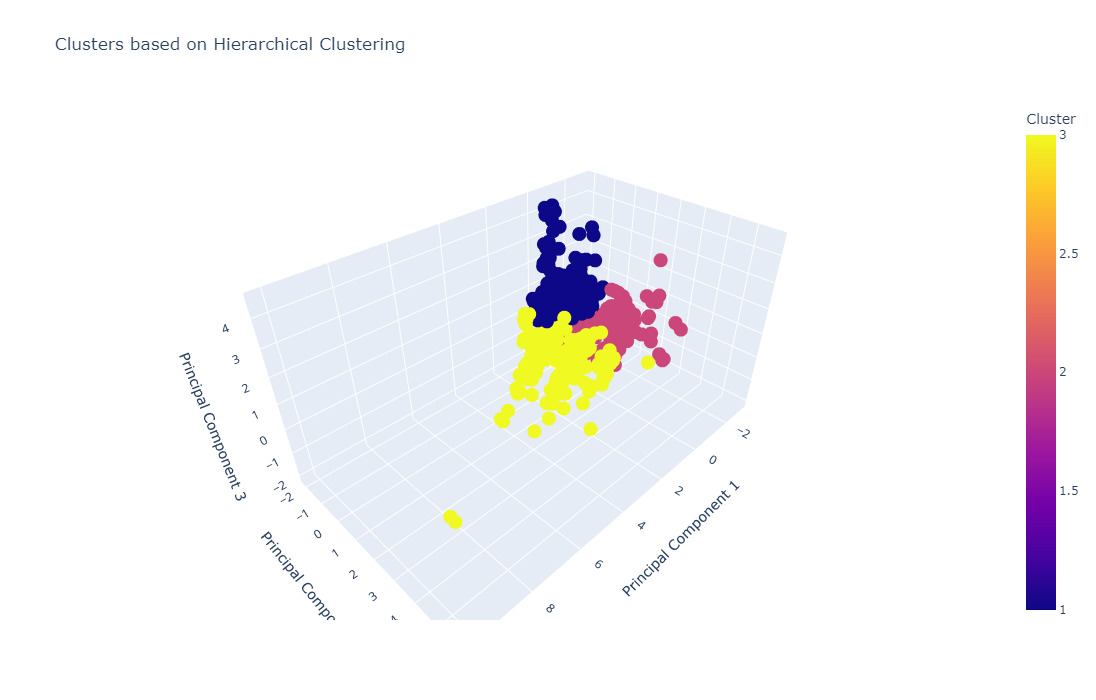

In [54]:
from scipy.cluster.hierarchy import fcluster
# Determine clusters using fcluster
num_clusters = 3
clusters = fcluster(hierarchical_clusters, num_clusters, criterion='maxclust')

df_plot['Cluster'] = clusters
fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3',color = 'Cluster', title='Clusters based on Hierarchical Clustering')
fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'
                ),
                width=1000, height=700)
fig.show()